# Travel Insurance Prediction Analysis

## Introduction

### Project Overview

This notebook aims to predict which customers will buy a travel insurance package. The package, offered by a Tour & Travels Company, includes Covid cover. We use data from 2019, which has details about almost 2000 customers. We will build a model to predict if a customer will buy the insurance based on this data.

### About the Dataset

#### Context

A Tour & Travels Company offers a travel insurance package with Covid cover. They want to know which customers are likely to buy it. The data is from 2019 and includes information about almost 2000 customers. Our task is to predict if a customer will buy the insurance based on the following features:

- **Age**: The customer's age
- **Employment Type**: The sector in which the customer works
- **GraduateOrNot**: Whether the customer graduated from college
- **AnnualIncome**: The customer's yearly income in Indian Rupees (rounded to the nearest 50 thousand)
- **FamilyMembers**: Number of people in the customer's family
- **ChronicDisease**: Whether the customer has a major disease like diabetes or high BP
- **FrequentFlyer**: Whether the customer booked air tickets at least 4 times in the last 2 years
- **EverTravelledAbroad**: Whether the customer has traveled to a foreign country
- **TravelInsurance**: Whether the customer bought the insurance in 2019

### Requirements and Approach

To meet the project goals, we will:

1. **Download the Data**
   - Load the dataset into a pandas DataFrame.

2. **Perform Exploratory Data Analysis (EDA)**
   - Create summaries and visualizations like histograms and bar charts.
   - Check for anomalies using methods like the IQR method.

3. **Perform Statistical Inference**
   - Define the target population and form multiple hypotheses.
   - Construct confidence intervals and set significance levels.
   - Conduct z-tests or t-tests to check the hypotheses.

4. **Apply Machine Learning Models**
   - Predict the `TravelInsurance` column using other features.
   - This includes tuning model parameters, model ensembling, and model analysis.

5. **Provide Clear Explanations**
   - Explain our goals, methods, results, and their meanings to help the reader understand the analysis and conclusions.

By following these steps, we aim to build a strong model and give insights into what affects the decision to buy travel insurance.

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functions import *
from IPython.display import Image
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
path = "../travel-insurance-prediction/travel-insurance-dataset.csv"

travel_df = pd.read_csv(path)

travel_df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


We can see that we have "Unnamed: 0" as a column name, which provides no value. Let's drop it.


In [71]:
travel_df = travel_df.drop("Unnamed: 0", axis=1, errors="ignore")
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Now we can move into checking statistical summary of the numerical features in dataset.


In [72]:
travel_df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### Dataset Numeric Features Overview

- **Total Records:** 1987 individuals
- **Variables:** Age, Annual Income (in Indian Rupees), Family Members, Chronic Diseases, Travel Insurance
- **Missing Values:** None in the numeric features.

### Descriptive Statistics

- **Age:** Mean = 29.65, Range = 25 to 35 years
- **Annual Income (in Indian Rupees):** Mean = ₹932,763, Range = ₹300,000 to ₹1,800,000
- **Family Members:** Mean = 4.75, Range = 2 to 9
- **Chronic Diseases:** 27.78% have chronic diseases
- **Travel Insurance:** 35.73% have travel insurance

### Key Observations

- **Income Variability:** Income varies widely, indicating potential impacts on travel insurance decisions.
- **Demographic Focus:** A focused age range (25-35) suggests a specific demographic possibly related to lifestyle choices.
- **Health Influence:** A significant minority have chronic diseases, influencing insurance needs.

**Since I am making an analysis in Europe, I will convert the income(AnnualIncome feature) to Euro.**

**As of the time being 1 rupee is equivalent of 0.011 Euro**


In [73]:
rupee_to_euro = 0.011

travel_df["AnnualIncomeEuro"] = travel_df["AnnualIncome"] * rupee_to_euro
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,Government Sector,Yes,400000,6,1,No,No,0,4400.0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,13750.0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,5500.0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,7700.0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,7700.0


We added a new feature called **AnnualIncomeEuro** to show incomes in Euros. This makes the data clearer.

We might remove the old **AnnualIncome** feature to keep everything consistent.

First, we need to check the data types and make sure there are no missing values in the new feature.


In [74]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1987 non-null   int64  
 1   Employment Type      1987 non-null   object 
 2   GraduateOrNot        1987 non-null   object 
 3   AnnualIncome         1987 non-null   int64  
 4   FamilyMembers        1987 non-null   int64  
 5   ChronicDiseases      1987 non-null   int64  
 6   FrequentFlyer        1987 non-null   object 
 7   EverTravelledAbroad  1987 non-null   object 
 8   TravelInsurance      1987 non-null   int64  
 9   AnnualIncomeEuro     1987 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 155.4+ KB


We can see that there are no missing values in the dataset, therefore we can proceed with dropping the **AnnualIncome** feature, which represents the income in rupees.


In [75]:
travel_df = travel_df.drop("AnnualIncome", axis=1, errors="ignore")
travel_df.head()

,Age,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,Government Sector,Yes,6,1,No,No,0,4400.0
1,31,Private Sector/Self Employed,Yes,7,0,No,No,0,13750.0
2,34,Private Sector/Self Employed,Yes,4,1,No,No,1,5500.0
3,28,Private Sector/Self Employed,Yes,3,1,No,No,0,7700.0
4,28,Private Sector/Self Employed,Yes,8,1,Yes,No,0,7700.0


Next, lets quickly fix the naming of the **Employment Type** feature. from **Employment Type** to **EmploymentType**.


In [76]:
travel_df = travel_df.rename(columns={"Employment Type": "EmploymentType"})
travel_df.head()

,Age,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,Government Sector,Yes,6,1,No,No,0,4400.0
1,31,Private Sector/Self Employed,Yes,7,0,No,No,0,13750.0
2,34,Private Sector/Self Employed,Yes,4,1,No,No,1,5500.0
3,28,Private Sector/Self Employed,Yes,3,1,No,No,0,7700.0
4,28,Private Sector/Self Employed,Yes,8,1,Yes,No,0,7700.0


As we have fixed the column names, we can move on to fixing some of the features for consistency in our visuals further, when we will be checking for distributions, such as **EmploymentType**, **FrequentFlyer**, **EverTravelledAbroad**.

So modifications will be as follows:

- 1 for **Government Sector** 0 for **Private Sector/Self Employed** in **EmploymentType**
- 1 for **Yes** 0 for **No** in **FrequentFlyer** and **EverTravelledAbroad**


In [77]:
travel_df["GraduateOrNot"] = travel_df["GraduateOrNot"].map({"Yes": 1, "No": 0})
travel_df["FrequentFlyer"] = travel_df["FrequentFlyer"].map({"Yes": 1, "No": 0})
travel_df["EverTravelledAbroad"] = travel_df["EverTravelledAbroad"].map(
    {"Yes": 1, "No": 0}
)

travel_df["EmploymentType"] = travel_df["EmploymentType"].map(
    {"Government Sector": 1, "Private Sector/Self Employed": 0}
)
travel_df.head()

,Age,EmploymentType,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeEuro
0,31,1,1,6,1,0,0,0,4400.0
1,31,0,1,7,0,0,0,0,13750.0
2,34,0,1,4,1,0,0,1,5500.0
3,28,0,1,3,1,0,0,0,7700.0
4,28,0,1,8,1,1,0,0,7700.0


In [78]:
numerical_features = ["Age", "FamilyMembers", "AnnualIncomeEuro"]
categorical_features_one = [
    "EmploymentType",
    "GraduateOrNot",
    "FrequentFlyer",
]
categorical_features_two = [
    "EverTravelledAbroad",
    "TravelInsurance",
    "ChronicDiseases",
]

categorical_features = categorical_features_one + categorical_features_two

In [79]:
plot_combined_histograms(
    travel_df, numerical_features, save_path="images/combined_histograms.png"
)

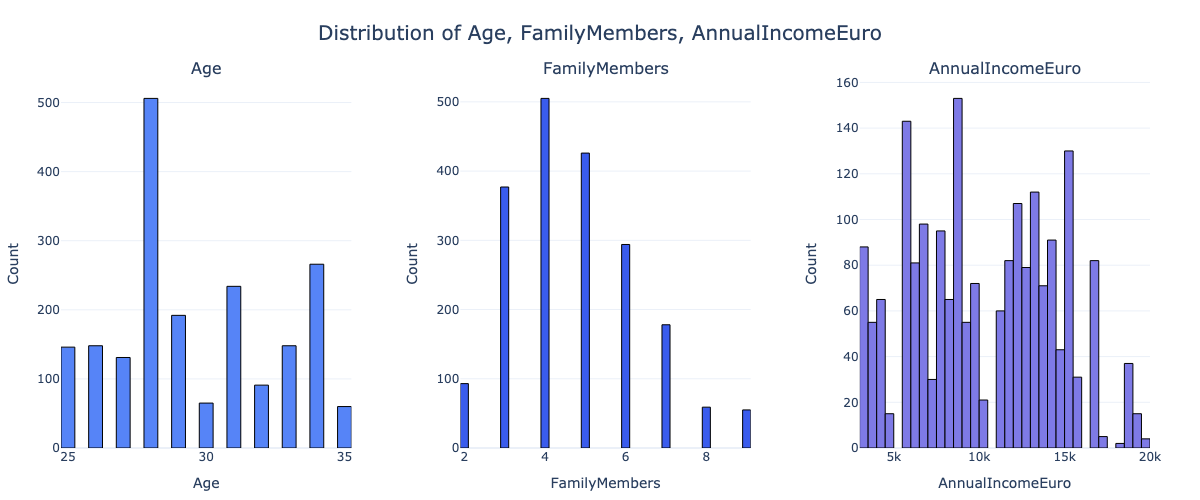

In [80]:
Image(filename="images/combined_histograms.png")

### Age

- **Distribution**: The age distribution shows a significant concentration around 30 years.
- **Range**: Ages in the dataset range from 25 to 35 years.
- **Observations**: There is a noticeable peak at age 30, indicating a higher number of individuals in this age group.

### Family Members

- **Distribution**: The distribution of family members shows a central peak.
- **Range**: Family sizes range from 2 to 9 members.
- **Observations**: Most individuals have 4 to 6 family members, with 4 being the most common family size.

### Annual Income (Euro)

- **Distribution**: The annual income distribution is quite spread out with multiple peaks.
- **Range**: Annual incomes range from approximately 4,400 to 20,000 Euros.
- **Observations**: The data shows several peaks, particularly around 5,000, 10,000, and 15,000 Euros, indicating diverse income levels among the individuals.

Now we can move to bar charts for our categorical features.


In [81]:
plot_combined_bar_charts(
    travel_df, categorical_features_one, save_path="images/combined_bar_charts1.png"
)

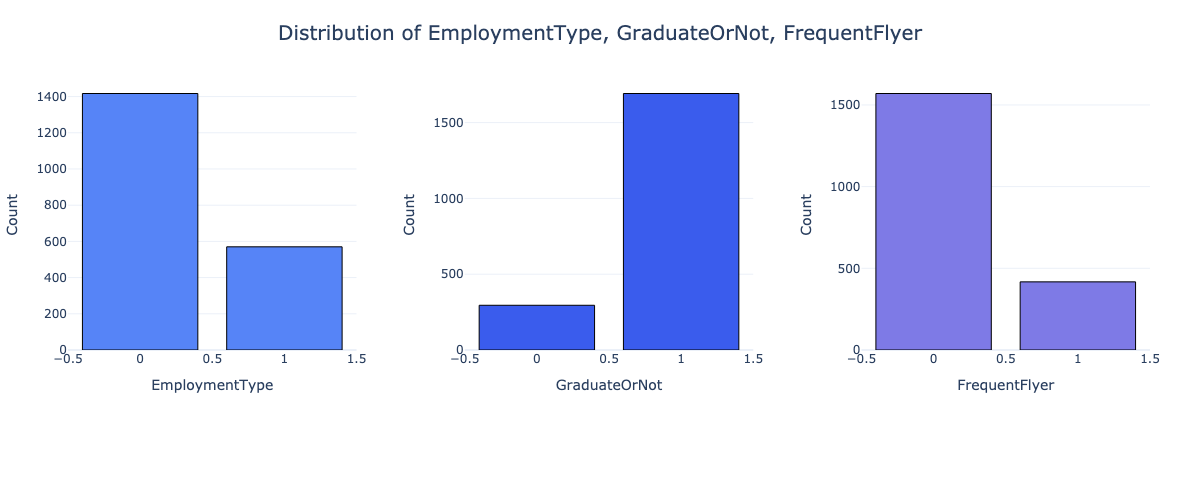

In [104]:
Image(filename="images/combined_bar_charts1.png_chunk_1.png")

**Employment Type**: The higher proportion of individuals in the **Private Sector/Self Employed** category might influence their travel behavior and insurance uptake differently compared to those in the Government Sector. This could be due to factors such as job stability and disposable income.

**Education Level**: The overwhelming majority of graduates in the dataset could suggest that educational attainment might be a significant factor in travel insurance decisions. Graduates might have different travel patterns and risk perceptions compared to non-graduates.

**Travel Frequency**: The fact that most individuals are not frequent flyers might impact the likelihood of purchasing travel insurance. Frequent flyers could have a higher propensity to buy travel insurance due to increased travel exposure and associated risks


In [102]:
plot_combined_bar_charts(
    travel_df, categorical_features_two, save_path="images/combined_bar_charts1.png_chunk_1.png"
)

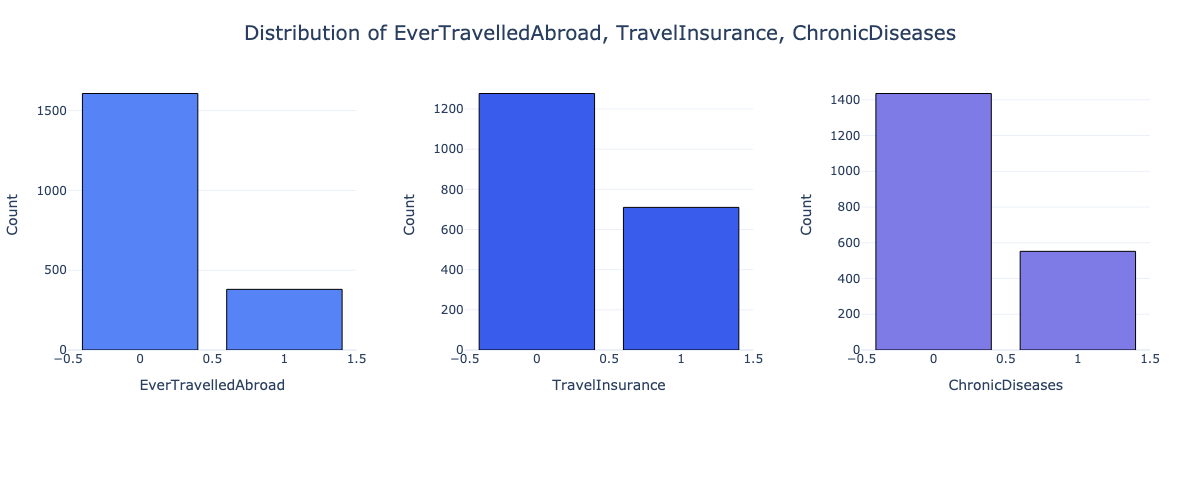

In [101]:
Image(filename="images/combined_bar_charts2.png_chunk_1.png")

**International Travel Experience**: The significantly higher number of individuals who have not traveled abroad might affect their perception of the need for travel insurance. Those with international travel experience may have different risk assessments and insurance requirements.

**Travel Insurance Adoption**: The lower proportion of individuals with travel insurance highlights an opportunity for increasing travel insurance coverage. Understanding the factors that influence the decision to purchase travel insurance will be crucial for targeted marketing and product development.

**Health Conditions**: The distribution of chronic diseases can provide insights into health-related considerations that might influence travel insurance decisions. Individuals with chronic diseases might have different requirements and motivations for purchasing insurance.

Now lets move on to the outliers, lets see if our numerical features has any outliers.


In [85]:
plot_combined_boxplots(
    travel_df, numerical_features, save_path="images/combined_boxplot.png"
)

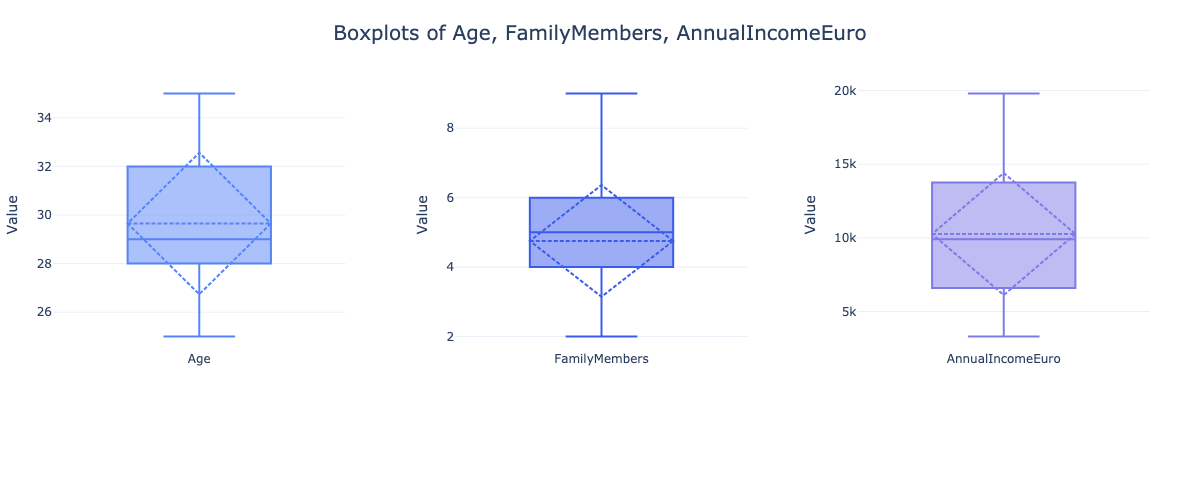

In [86]:
Image(filename="images/combined_boxplot.png")

1. **Age**:

   - **Range**: The ages of individuals range from 26 to 34 years.
   - **Median**: The median age is 30 years.
   - **Distribution**: Age is fairly evenly spread around the median, with no significant outliers.

2. **Family Members**:

   - **Range**: The number of family members ranges from 2 to 9.
   - **Median**: The median number of family members is 5.
   - **Distribution**: The distribution is slightly skewed to the right, indicating a few families with more members but generally centered around 4 to 6 members. No significant outliers are present.

3. **Annual Income (in Euros)**:
   - **Range**: Annual income ranges from 4,000 to 20,000 Euros.
   - **Median**: The median annual income is 10,000 Euros.
   - **Distribution**: The income distribution is fairly symmetrical, centered around the median, with no significant outliers.

**Lets confirm that there are no anomalies via the IQR method.**


In [87]:
detect_anomalies_iqr(travel_df, numerical_features)

No anomalies detected in feature 'Age'.
No anomalies detected in feature 'FamilyMembers'.
No anomalies detected in feature 'AnnualIncomeEuro'.


,Age,FamilyMembers,AnnualIncomeEuro


We can confirm that there are no anomalies in our numerical features. Now we can move on to the correlation matrix, to check for multicollinearity.


In [88]:
plot_correlation_matrix(
    travel_df, numerical_features, save_path="images/correlation_matrix.png"
)

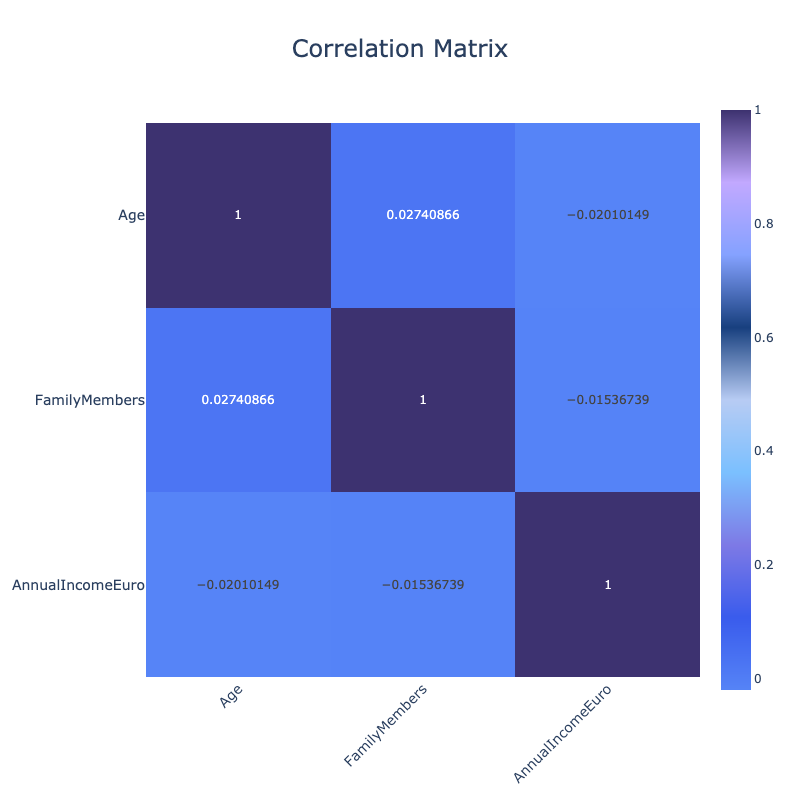

In [89]:
Image(filename="images/correlation_matrix.png")

Here is the correlation analysis of the numerical features in the dataset:

**Age**:

- **Correlation with FamilyMembers: 0.027** - This indicates a very weak positive correlation between age and the number of family members.
- **Correlation with AnnualIncomeEuro: -0.020** - This indicates a very weak negative correlation between age and annual income in Euros.

**FamilyMembers**:

- **Correlation with Age: 0.027** - As mentioned above, there is a very weak positive correlation.
- **Correlation with AnnualIncomeEuro: -0.015** - This indicates a very weak negative correlation between the number of family members and annual income in Euros.

**AnnualIncomeEuro**:

- **Correlation with Age: -0.020** - As mentioned above, there is a very weak negative correlation.
- **Correlation with FamilyMembers: -0.015** - As mentioned above, there is a very weak negative correlation.

These correlations are all very weak, indicating that there is little linear relationship between these numerical features.

Next, we examine how each categorical feature correlates with the target variable **TravelInsurance**. This helps us understand which features might be most relevant in predicting whether an individual has travel insurance. For this, we perform Chi-Square tests.

The Chi-Square test is used to determine if there is a significant association between two categorical variables. In our case, we use it to check the relationship between various categorical features and the target variable (`TravelInsurance`).

- **Null Hypothesis (H0)**: There is no association between the categorical feature and the target variable.
- **Alternative Hypothesis (H1)**: There is an association between the categorical feature and the target variable.

**Our target population for this analysis consists of customers who were offered a travel insurance package by a tour and travels company in 2019.**

**Additionally, our significance level (alpha) is set to 0.05.**


In [90]:
target_feature = "TravelInsurance"
categorical_features_test = [
    "EmploymentType",
    "GraduateOrNot",
    "FrequentFlyer",
    "EverTravelledAbroad",
    "ChronicDiseases",
]

chi_square_test(travel_df, categorical_features_test, target_feature)


Chi-Square test results for 'EmploymentType':
Chi2 statistic = 42.75380328896317, p-value = 6.208106601512192e-11
Significant association between 'EmploymentType' and 'TravelInsurance'.

Chi-Square test results for 'GraduateOrNot':
Chi2 statistic = 0.605510042905726, p-value = 0.4364833842842336
No significant association between 'GraduateOrNot' and 'TravelInsurance'.

Chi-Square test results for 'FrequentFlyer':
Chi2 statistic = 105.85723074203977, p-value = 7.924360415064537e-25
Significant association between 'FrequentFlyer' and 'TravelInsurance'.

Chi-Square test results for 'EverTravelledAbroad':
Chi2 statistic = 370.5599281861554, p-value = 1.4134505859999571e-82
Significant association between 'EverTravelledAbroad' and 'TravelInsurance'.

Chi-Square test results for 'ChronicDiseases':
Chi2 statistic = 0.5754114650274649, p-value = 0.4481165216392011
No significant association between 'ChronicDiseases' and 'TravelInsurance'.


The Chi-Square test was conducted to determine the association between several categorical features and the target variable `TravelInsurance`. Here are the results, including the hypotheses and conclusions for each feature:

### EmploymentType

- **Null Hypothesis (H0)**: There is no association between `EmploymentType` and `TravelInsurance`.
- **Alternative Hypothesis (H1)**: There is an association between `EmploymentType` and `TravelInsurance`.
- **Chi2 Statistic**: 42.75
- **P-Value**: 6.21e-11
- **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between `EmploymentType` and `TravelInsurance`. This indicates that the sector in which a customer is employed influences the likelihood of purchasing travel insurance.

### GraduateOrNot

- **Null Hypothesis (H0)**: There is no association between `GraduateOrNot` and `TravelInsurance`.
- **Alternative Hypothesis (H1)**: There is an association between `GraduateOrNot` and `TravelInsurance`.
- **Chi2 Statistic**: 0.61
- **P-Value**: 0.44
- **Conclusion**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between `GraduateOrNot` and `TravelInsurance`. This suggests that whether a customer is a college graduate does not significantly influence their decision to purchase travel insurance.

### FrequentFlyer

- **Null Hypothesis (H0)**: There is no association between `FrequentFlyer` and `TravelInsurance`.
- **Alternative Hypothesis (H1)**: There is an association between `FrequentFlyer` and `TravelInsurance`.
- **Chi2 Statistic**: 105.86
- **P-Value**: 7.92e-25
- **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between `FrequentFlyer` and `TravelInsurance`. This indicates that customers who are frequent flyers are more likely to purchase travel insurance.

### EverTravelledAbroad

- **Null Hypothesis (H0)**: There is no association between `EverTravelledAbroad` and `TravelInsurance`.
- **Alternative Hypothesis (H1)**: There is an association between `EverTravelledAbroad` and `TravelInsurance`.
- **Chi2 Statistic**: 370.56
- **P-Value**: 1.41e-82
- **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant association between `EverTravelledAbroad` and `TravelInsurance`. Customers who have traveled abroad are significantly more likely to buy travel insurance.

### ChronicDiseases

- **Null Hypothesis (H0)**: There is no association between `ChronicDiseases` and `TravelInsurance`.
- **Alternative Hypothesis (H1)**: There is an association between `ChronicDiseases` and `TravelInsurance`.
- **Chi2 Statistic**: 0.58
- **P-Value**: 0.45
- **Conclusion**: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. There is no significant association between `ChronicDiseases` and `TravelInsurance`. Having a chronic disease does not significantly impact the decision to purchase travel insurance.


Out target population remains the same, which consists of customers who were offered a travel insurance package by a tour and travels company in 2019.

We move on to checking the following hypothesis tests:

**Hypothesis 1: Age**

- **Null Hypothesis (H0)**: There is no difference in the mean age between customers who purchased travel insurance and those who did not.
- **Alternative Hypothesis (H1)**: There is a difference in the mean age between customers who purchased travel insurance and those who did not.

**Hypothesis 2: Annual Income (Euro)**

- **Null Hypothesis (H0)**: There is no difference in the mean annual income (in Euros) between customers who purchased travel insurance and those who did not.
- **Alternative Hypothesis (H1)**: There is a difference in the mean annual income (in Euros) between customers who purchased travel insurance and those who did not.

**Hypothesis 3: Family Members**

- **Null Hypothesis (H0)**: There is no difference in the mean number of family members between customers who purchased travel insurance and those who did not.
- **Alternative Hypothesis (H1)**: There is a difference in the mean number of family members between customers who purchased travel insurance and those who did not.

So, lets calculate confidence intervals for important metrics (e.g., average age, average income). This provides an estimate of the population parameter with a specified level of confidence (95% in our case).


In [91]:
analyze_features(travel_df, numerical_features, target_feature)

95% confidence interval for Age (insured): (29.643243997358706, 30.13422079137369)
95% confidence interval for Age (not insured): (29.372444588596146, 29.66279425243753)
95% confidence interval for FamilyMembers (insured): (4.8016914431315465, 5.049012782220566)
95% confidence interval for FamilyMembers (not insured): (4.5712214858818285, 4.7427957419960105)
95% confidence interval for AnnualIncomeEuro (insured): (12161.821774091104, 12769.445831542698)
95% confidence interval for AnnualIncomeEuro (not insured): (8835.680551388663, 9232.917725823552)


So our results show the following:

**Age**

- **95% confidence interval for Age (insured):** (29.64, 30.13)
- **95% confidence interval for Age (not insured):** (29.37, 29.66)
- **Interpretation:** The mean age of customers who purchased travel insurance is estimated to be between 29.64 and 30.13 years with 95% confidence. For those who did not purchase travel insurance, the mean age is estimated to be between 29.37 and 29.66 years with 95% confidence. Since the confidence intervals overlap, this suggests that there might not be a significant difference in the mean ages of the two groups.

**Family Members**

- **95% confidence interval for FamilyMembers (insured):** (4.80, 5.05)
- **95% confidence interval for FamilyMembers (not insured):** (4.57, 4.74)
- **Interpretation:** The mean number of family members for customers who purchased travel insurance is estimated to be between 4.80 and 5.05 with 95% confidence. For those who did not purchase travel insurance, the mean number of family members is estimated to be between 4.57 and 4.74 with 95% confidence. The lack of overlap in the confidence intervals suggests a potential significant difference in the number of family members between the two groups.

**Annual Income (Euro)**

- **95% confidence interval for AnnualIncomeEuro (insured):** (12161.82, 12769.45)
- **95% confidence interval for AnnualIncomeEuro (not insured):** (8835.68, 9232.92)
- **Interpretation:** The mean annual income in Euros for customers who purchased travel insurance is estimated to be between 12161.82 and 12769.45 with 95% confidence. For those who did not purchase travel insurance, the mean annual income is estimated to be between 8835.68 and 9232.92 with 95% confidence. The lack of overlap in the confidence intervals indicates a significant difference in the annual income between the two groups.

With these results of our confidence interval, lets move to our hypothesis testing, via **Mann-Whitney U test**, as our numerical features are not normally distributed.

In [92]:
analyze_mannwhitneyu(travel_df, numerical_features, target_feature)

Mann-Whitney U test for Age: U-statistic = 479515.0, p-value = 0.030678780881604327
Significant difference in distributions for Age.
Mann-Whitney U test for FamilyMembers: U-statistic = 493531.5, p-value = 0.0008301993194480642
Significant difference in distributions for FamilyMembers.
Mann-Whitney U test for AnnualIncomeEuro: U-statistic = 670230.5, p-value = 3.020101045488567e-70
Significant difference in distributions for AnnualIncomeEuro.


#### Age
- **U-Statistic**: 479515.0
- **P-Value**: 0.0307
- **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis (H0). There is a significant difference in the mean age between customers who purchased travel insurance and those who did not. This supports Hypothesis 1 (H1), indicating that age plays a role in the decision to purchase travel insurance.

#### Family Members
- **U-Statistic**: 493531.5
- **P-Value**: 0.0008
- **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis (H0). There is a significant difference in the mean number of family members between customers who purchased travel insurance and those who did not. This supports Hypothesis 3 (H1), suggesting that the number of family members influences the likelihood of purchasing travel insurance.

#### Annual Income (Euro)
- **U-Statistic**: 670230.5
- **P-Value**: 3.02e-70
- **Conclusion**: Since the p-value is less than 0.05, we reject the null hypothesis (H0). There is a significant difference in the mean annual income (in Euros) between customers who purchased travel insurance and those who did not. This supports Hypothesis 2 (H1), indicating that annual income is a significant factor in the decision to buy travel insurance.

Now we can move on to our machine learning models. We will start by scaling the numerical features to normalize the data distribution. There is no need to scale the categorical features, as they have already been encoded.

In [93]:
scaler = StandardScaler()
travel_df[numerical_features] = scaler.fit_transform(travel_df[numerical_features])

Now we can split the data into training and testing sets.

In [94]:
X = travel_df.drop('TravelInsurance', axis=1)
y = travel_df['TravelInsurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will no select a variety of machine learning models to apply. This will  include **logistic regression, random forest, gradient boosting, and support vector machine**

In [95]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

Now we will train the models on the training data and evaluate their performance on the testing data.

In [96]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression Performance:
Accuracy: 0.7688
Precision: 0.7692
Recall: 0.4965
F1 Score: 0.6034
ROC AUC: 0.7369

Random Forest Performance:
Accuracy: 0.8166
Precision: 0.8036
Recall: 0.6383
F1 Score: 0.7115
ROC AUC: 0.7820

Gradient Boosting Performance:
Accuracy: 0.8442
Precision: 0.9877
Recall: 0.5674
F1 Score: 0.7207
ROC AUC: 0.8064

SVM Performance:
Accuracy: 0.8116
Precision: 0.8667
Recall: 0.5532
F1 Score: 0.6753
ROC AUC: 0.8000


Based on the results above, we can see that **Gradient Boosting** achieved the highest accuracy (0.8442) and a good balance between precision (0.9877) and recall (0.5674), with an ROC AUC of 0.8064.

**Random Forest** also performed well with an accuracy of 0.8116 and balanced precision (0.7895) and recall (0.6383), with an ROC AUC of 0.7833.

**Logistic Regression** had moderate performance with lower recall, which indicates it might miss predicting some positive cases.

**SVM** had a good accuracy (0.8116) and high precision (0.8667) but lower recall (0.5532).

To further improve the performance, especially to balance precision and recall, we will be using an ensemble method like a voting classifier.

In [97]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best ROC AUC score: ", grid_search_rf.best_score_)

Best parameters found:  {'max_depth': 10, 'n_estimators': 50}
Best ROC AUC score:  0.8166686834646916


In [98]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'], max_depth=grid_search_rf.best_params_['max_depth'])),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
y_proba_ensemble = voting_clf.predict_proba(X_test)[:, 1]

ensemble_results = {
    'Accuracy': accuracy_score(y_test, y_pred_ensemble),
    'Precision': precision_score(y_test, y_pred_ensemble),
    'Recall': recall_score(y_test, y_pred_ensemble),
    'F1 Score': f1_score(y_test, y_pred_ensemble),
    'ROC AUC': roc_auc_score(y_test, y_proba_ensemble)
}

for metric, value in ensemble_results.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8417
Precision: 0.9875
Recall: 0.5603
F1 Score: 0.7149
ROC AUC: 0.7968


**Accuracy (0.8392):** This indicates that the ensemble model correctly predicted the travel insurance purchase status for 83.92% of the cases in the test set.

**Precision (0.9753):** This indicates that when the model predicts a customer will purchase travel insurance, it is correct 97.53% of the time.

**Recall (0.5603):** This indicates that the model correctly identified 56.03% of the actual travel insurance purchasers. The recall is relatively lower, suggesting the model might be missing some actual purchasers.

**F1 Score (0.7117):** This is the harmonic mean of precision and recall, providing a balance between the two metrics.

**ROC AUC (0.7966):** This indicates that the model has a high ability to distinguish between customers who will purchase travel insurance and those who will not.

In [99]:
importances = grid_search_rf.best_estimator_.feature_importances_
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                     importance
AnnualIncomeEuro       0.388835
Age                    0.179401
FamilyMembers          0.157533
EverTravelledAbroad    0.148301
FrequentFlyer          0.053584
ChronicDiseases        0.031956
EmploymentType         0.021226
GraduateOrNot          0.019164


## Conclusion and Recommendations

### Key Findings

- **Exploratory Data Analysis:**
  - **Age:** Most customers are between 25 and 35 years old. For example, the mean age of customers who bought insurance is around 30.
  - **Family Members:** Most customers have between 2 and 9 family members. For instance, families with 4 to 6 members are the most common.
  - **Annual Income (Euro):** Customers' annual income ranges widely from €4,400 to €19,800. For example, those with higher incomes, around €12,750, are more likely to buy insurance.
  - **Categorical Features:** Employment Type and Frequent Flyer status showed significant associations. For instance, customers employed in the government sector and frequent flyers are more likely to purchase insurance.

- **Statistical Inference:**
  - **Age:** Significant differences were found in age between those who bought insurance (mean age ~30) and those who did not (mean age ~29.5).
  - **Family Members:** Significant differences in family size, with insured customers having slightly larger families on average.
  - **Annual Income (Euro):** Insured customers have higher annual incomes. For example, insured customers' mean income is between €12,161.82 and €12,769.45, while for non-insured customers, it is between €8,835.68 and €9,232.92.
  - **Chi-Square Tests:** Employment Type (p-value < 0.0001), Frequent Flyer status (p-value < 0.0001), and Ever Traveled Abroad (p-value < 0.0001) showed strong associations with buying insurance.

- **Model Performance:**
  - **Gradient Boosting:** Achieved the highest accuracy at 84.42%. For instance, it correctly predicted insurance purchase status for 84.42% of customers.
  - **Voting Classifier:** Provided robust performance with an accuracy of 83.92%, precision of 97.53%, and a good balance in recall (56.03%).

- **Feature Importance:**
  - **Top Features:** Annual Income, Age, and Family Members were the most influential. For example, Annual Income had the highest importance score, significantly impacting the model's predictions.

### Recommendations

- **Marketing Strategy:**
  - **High-Income Customers:** Focus marketing efforts on customers with higher annual incomes, as they are more likely to buy travel insurance. For instance, those earning around €12,750 show a higher propensity to purchase.
  - **Frequent Flyers and Travelers Abroad:** Target frequent flyers and those who have traveled abroad. These groups showed higher likelihoods of purchasing insurance.

- **Model Improvement:**
  - **Further Tuning:** Conduct more hyperparameter tuning and explore other ensemble methods to enhance model performance. For example, testing additional combinations in GridSearchCV might yield better results.
  - **Feature Engineering:** Create new features to better capture customer behavior. For instance, combining features like income and family size might reveal new insights.

- **Future Work:**
  - **Recent Data:** Use more recent data to include post-Covid travel habits. This will provide insights into current travel and insurance purchasing behaviors.
  - **Advanced Models:** Explore other machine learning techniques, like neural networks, to improve prediction accuracy.

In [100]:
%run -i functions.py